In [1]:
## PCA
## This file contains the basic function of PCA.
## Author: Xiang Li

###Sample
#### Imput Package
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

In [3]:
PATH_FOLDER='/mnt/d/bioproject/Data/Haihui/Tcf1/Hdac/'
df = pd.read_excel(PATH_FOLDER+'Hdac Treg DEGs.xlsx', sheet_name='all DEGs',\
sep=',', header=1, usecols=['WT2_Treg_D20', 'WT1_Treg_D12', 'WT2_Treg_D12', \
'Hdac12_KO_het1_Treg_D20', 'Hdac12_KO_het1_Treg_D20', 'Hdac12_KO_het2_Treg_D20',\
'Hdac12_KO1_Treg_D20', 'Hdac12_KO2_Treg_D20' ]) #, index_col= )
df=df.dropna(axis=0, how='any')
#df = df[(df >= 0).all(axis=1)]
#df=df.replace(0,0.000001)
df.index.name='gene_id'
df.shape

(2041, 7)

In [4]:
# PCA
#### Change "gene_id" from index to column
df_2 = df #.reset_index()

#### Remove unicode of list in python 
df2_gene_id = [x.encode('ascii', 'ignore') for x in df_2.index]


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler


targets = ['WT2_Treg_D20', 'WT1_Treg_D12', 'WT2_Treg_D12', 'Hdac12_KO_het1_Treg_D20',\
'Hdac12_KO_het2_Treg_D20','Hdac12_KO1_Treg_D20', 'Hdac12_KO2_Treg_D20']

df_2_T = df_2.transpose()

# Separating out the features
x = df_2_T.loc[ :, df2_gene_id ].values


# Separating out the target
y = df_2_T.loc[targets,:].values


# Standardizing the featuresbio
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


########### THIS is fucking killing me. reindex df with df2, just using following command.
principalDf.index = df_2_T.index

#finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
principalDf

,principal component 1,principal component 2
WT2_Treg_D20,-35.056231,2.603285
WT1_Treg_D12,-29.589026,-20.032202
WT2_Treg_D12,-32.367838,-21.205593
Hdac12_KO_het1_Treg_D20,42.759123,-19.379084
Hdac12_KO_het2_Treg_D20,37.925313,-19.028946
Hdac12_KO1_Treg_D20,17.336293,23.991096
Hdac12_KO2_Treg_D20,-1.007635,53.051445


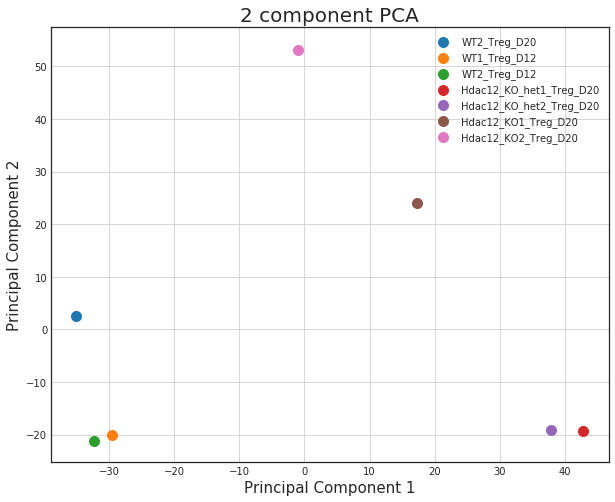

In [5]:
### PLOT

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100)
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='CD8_HP'
fig.savefig('PCA'+Parameters_Detail+'.png')
